In [1]:
import sys
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy.ma as ma

%matplotlib inline
%autosave 60

Autosaving every 60 seconds


In [2]:
sys.path.insert(0,'/home/albert/lib/python/AJ-spectre/')
from natl60_10_by_10_boxes import boxes
import plot_box as pb

In [3]:
database = '/media/extra/DATA/NATL60/NATL60-CJM165-S/'
buoyfile = database + 'filt-3D/NATL60-CJM165_y2013m03d01.1d_buoyancy_filt-n80-f0.0125.nc'
wfile = database + 'filt-3D/NATL60-CJM165_y2013m03d01.1d_vovecrtz_filt-n80-f0.0125.nc'
mldfile = database + 'MXL/NATL60-CJM165_y2013m03d01.1d_somxl010.nc'
maskfile= '/media/extra/DATA/NATL60/NATL60-I/NATL60_v4.1_cdf_byte_mask.nc'

In [4]:
dep=xr.open_dataset(buoyfile)['deptht']

In [6]:
def get_values_in_box(box,data):
    jmin,jmax = box.jmin,box.jmax
    imin,imax = box.imin,box.imax
    values = data[:,0:79,jmin:jmax+1,imin:imax+1]
    return values


In [7]:
def get_2Dvalues_in_box(box,data):
    jmin,jmax = box.jmin,box.jmax
    imin,imax = box.imin,box.imax
    values = data[:,jmin:jmax+1,imin:imax+1]
    return values


In [15]:
def Estimate_wb(box,buoy,w,tmask,wmask):
    buoy_box = get_values_in_box(box,buoy)
    w_box = get_values_in_box(box,w)  
    
    tmask_box = get_values_in_box(box,tmask)
    wmask_box = get_values_in_box(box,wmask)
    
        
    if box.name == 'Box_12':
        tmask_box[:,49,950:965,10:140]=0
        
    if box.name == 'Box_11':
        tmask_box[:,54,200:225,40:60]=0
    
    buoy_box_mask=ma.masked_where(tmask_box == 0, buoy_box)
    w_box_mask=ma.masked_where(wmask_box == 0, w_box)
    
    avg_wb_box=np.ones(len(dep[0:79]))
    
    for k in np.arange(len(dep[0:79])):
        avg_wb_box[k] = np.nanmean(buoy_box_mask[0,k,:,:]*w_box_mask[0,k,:,:])
    return avg_wb_box

In [9]:
def Estimate_mld(box,mld):
    mld_box = get_2Dvalues_in_box(box,mld)
    avg_mld_box=np.nanmean(mld_box)
    return avg_mld_box

In [12]:
def get_wb_in_boxes(buoyfile,wfile):
    global boxes
    buoy = xr.open_dataset(buoyfile)['sobuoy']
    w = xr.open_dataset(wfile)['vovecrtz']
    tmask = xr.open_dataset(maskfile)['tmask']
    wmask = xr.open_dataset(maskfile)['fmask']
    _wb_arr=[]
    for box in boxes:
        print box.name
        wb = Estimate_wb(box,buoy,w,tmask,wmask)
        _wb_arr.append(wb)
    wb_arr = np.array(_wb_arr)
    return wb_arr

In [11]:
def get_mld_in_boxes(mldfiles):
    global boxes
    mld = xr.open_dataset(mldfile)['somxl010']
    _mld_arr=[]
    for box in boxes:
        mldb = Estimate_mld(box,mld)
        _mld_arr.append(mldb)
    mld_arr = np.array(_mld_arr)
    return mld_arr

In [16]:
wb_boxes=get_wb_in_boxes(buoyfile,wfile)

Box_14
Box_13
Box_12
Box_11
Box_10
Box_7
Box_6
Box_5
Box_4
Box_3
Box_2
Box_1
Box_9
Box_8


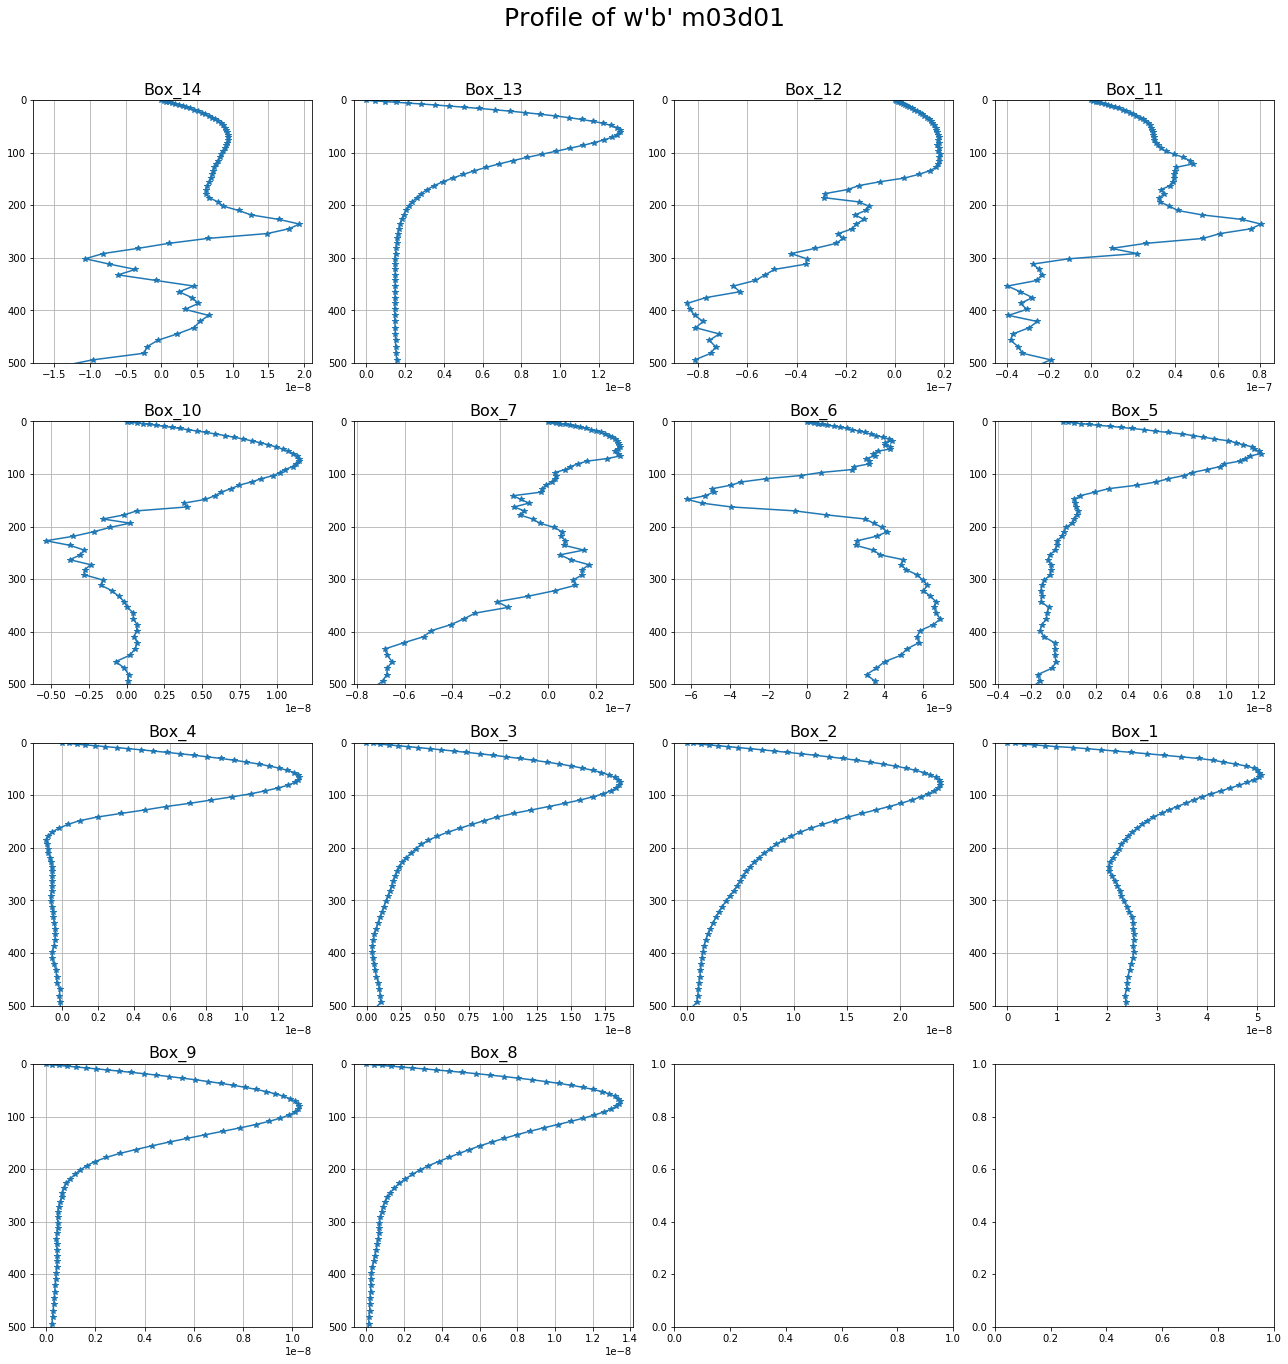

In [20]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Profile of w\'b\' m03d01'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for k,box in enumerate(boxes):
    axs[i].plot(wb_boxes[k,:],dep[0:79],'C0*-')
    axs[i].set_title(box.name,size=16)
    axs[i].grid(True)
    axs[i].set_ylim(500,0)
    i = i + 1
    fig.tight_layout()
    
#plt.savefig("NATL60_sub_vert_buoy_flx_2param_march.png")

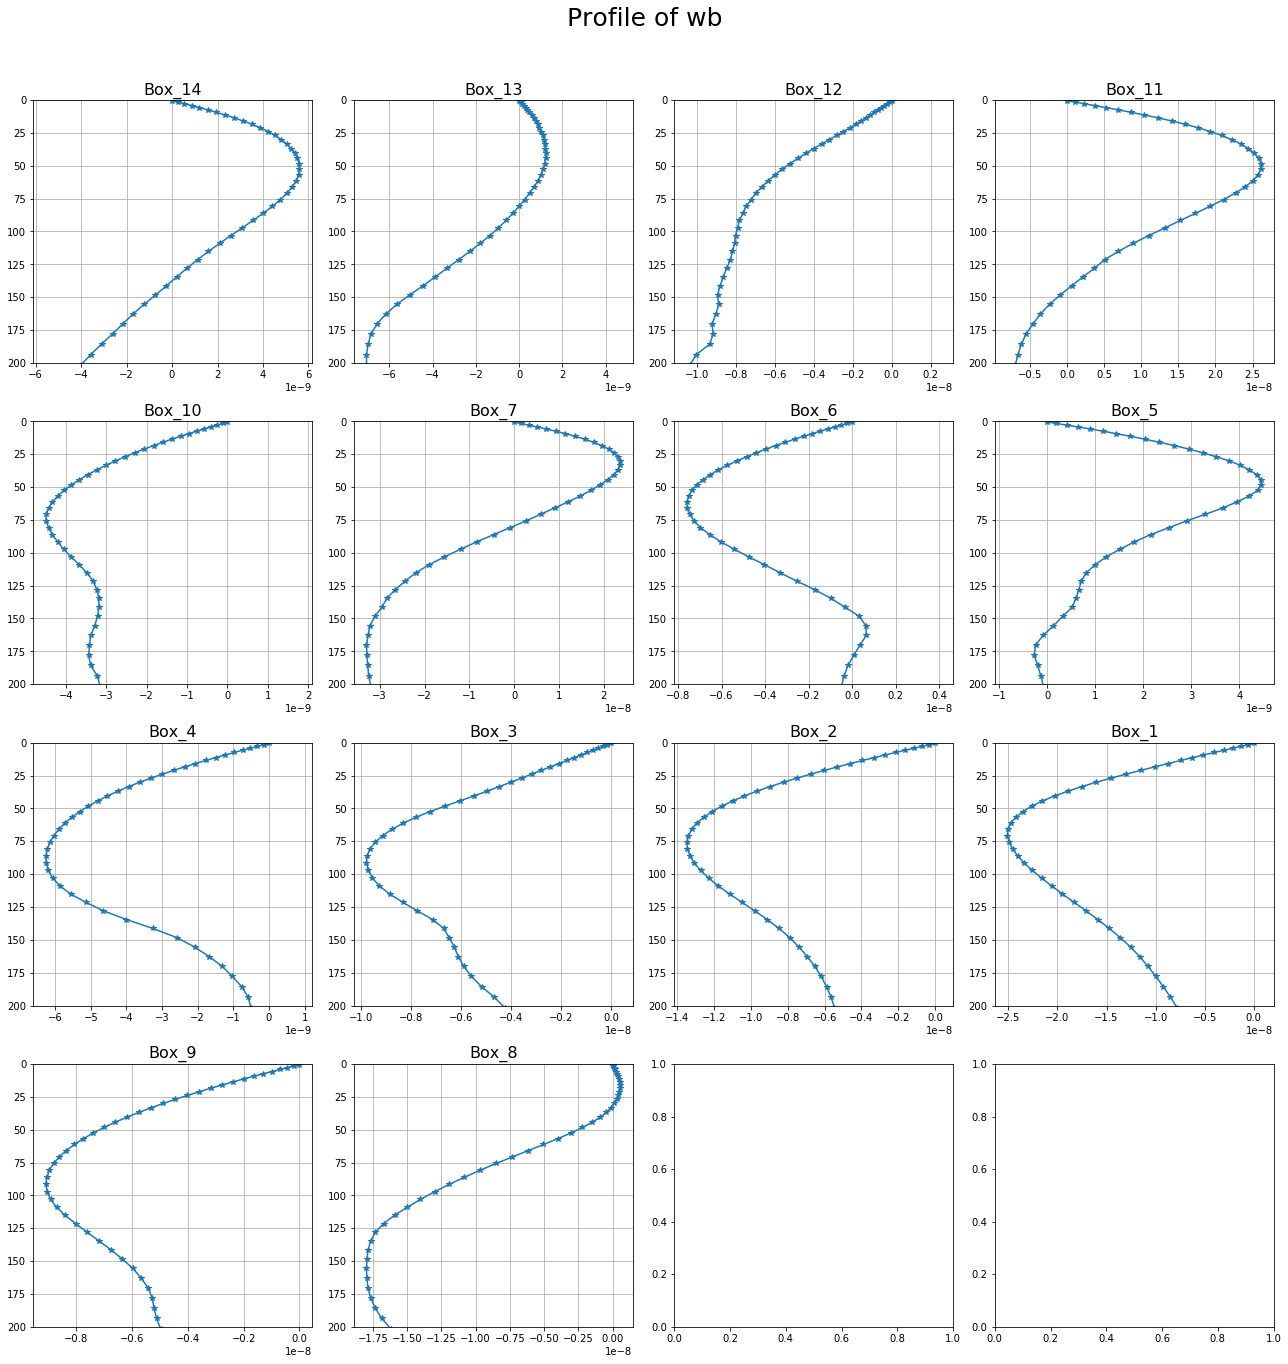

In [330]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Profile of wb'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for k,box in enumerate(boxes):
    axs[i].plot(wb_boxes_yr[k,:],dep,'C0*-')
    axs[i].set_title(box.name,size=16)
    axs[i].grid(True)
    axs[i].set_ylim(200,0)
    i = i + 1
    fig.tight_layout()
    
plt.savefig("NATL60_y2013m03d01_wb_prof_surf.png")

In [336]:
truc=np.nanmean(w_boxes_day2[:,k,:],0)
truc.shape

(139,)

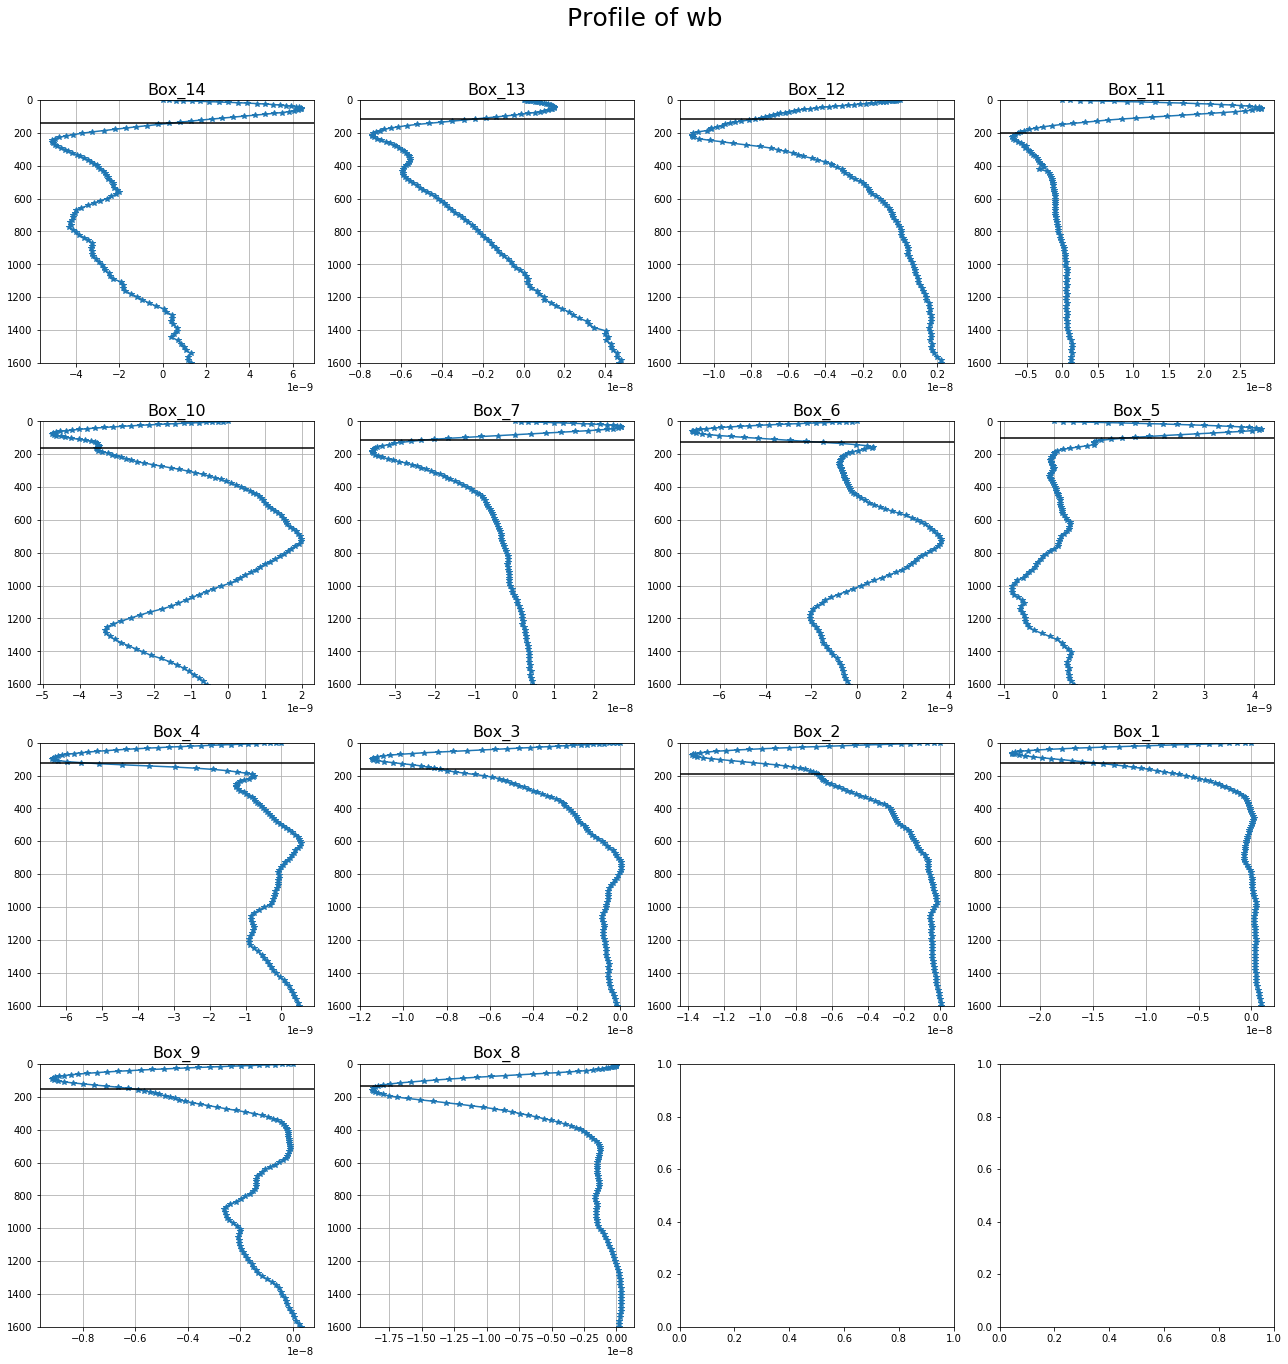

In [340]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Profile of wb'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for k,box in enumerate(boxes):
    axs[i].plot(np.nanmean(w_boxes_day2[:,k,:],0),dep,'C0*-')
    axs[i].set_title(box.name,size=16)
    axs[i].grid(True)
    axs[i].set_ylim(1600,0)
    axs[i].axhline(y=np.nanmean(mld_boxes_day2[:,k]),color='k')
    i = i + 1
    fig.tight_layout()
    
#plt.savefig("NATL60_sub_vert_buoy_flx_2param_march.png")

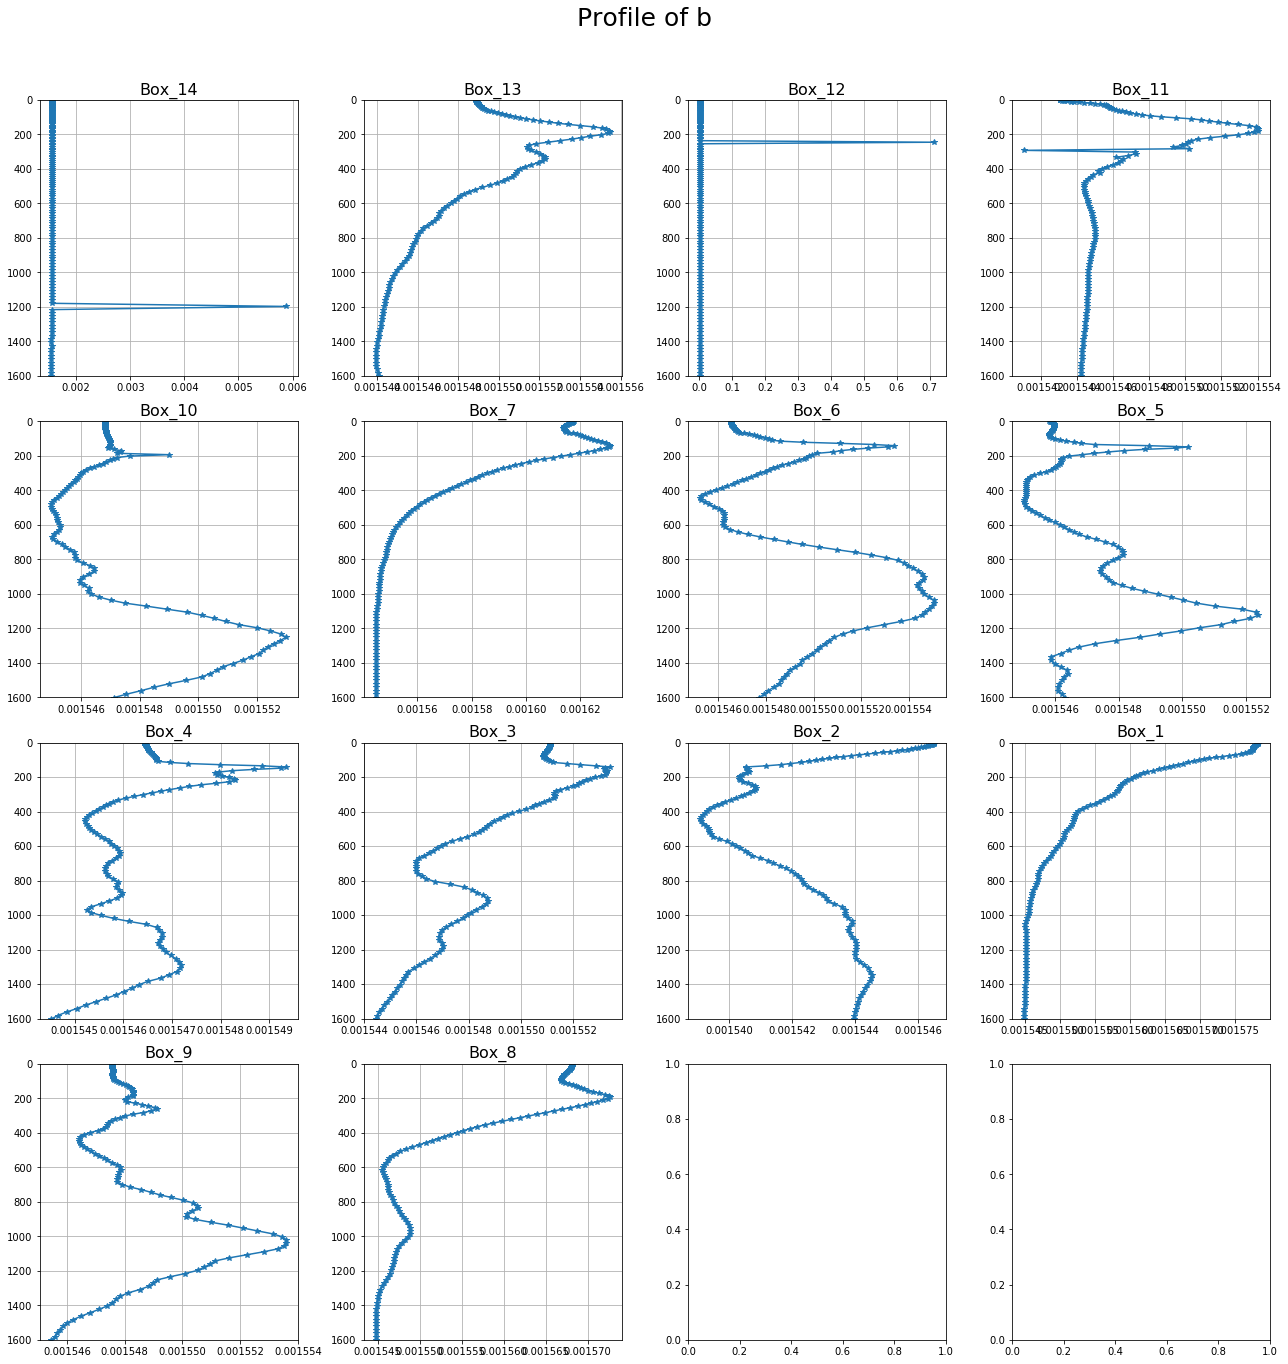

In [225]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Profile of b'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for k,box in enumerate(boxes):
    axs[i].plot(b_boxes_yr[k,:],dep,'C0*-')
    axs[i].set_title(box.name,size=16)
    axs[i].grid(True)
    axs[i].set_ylim(1600,0)
    i = i + 1
    fig.tight_layout()
    
#plt.savefig("NATL60_sub_vert_buoy_flx_2param_march.png")

In [ ]:
for k,box in enumerate(boxes):


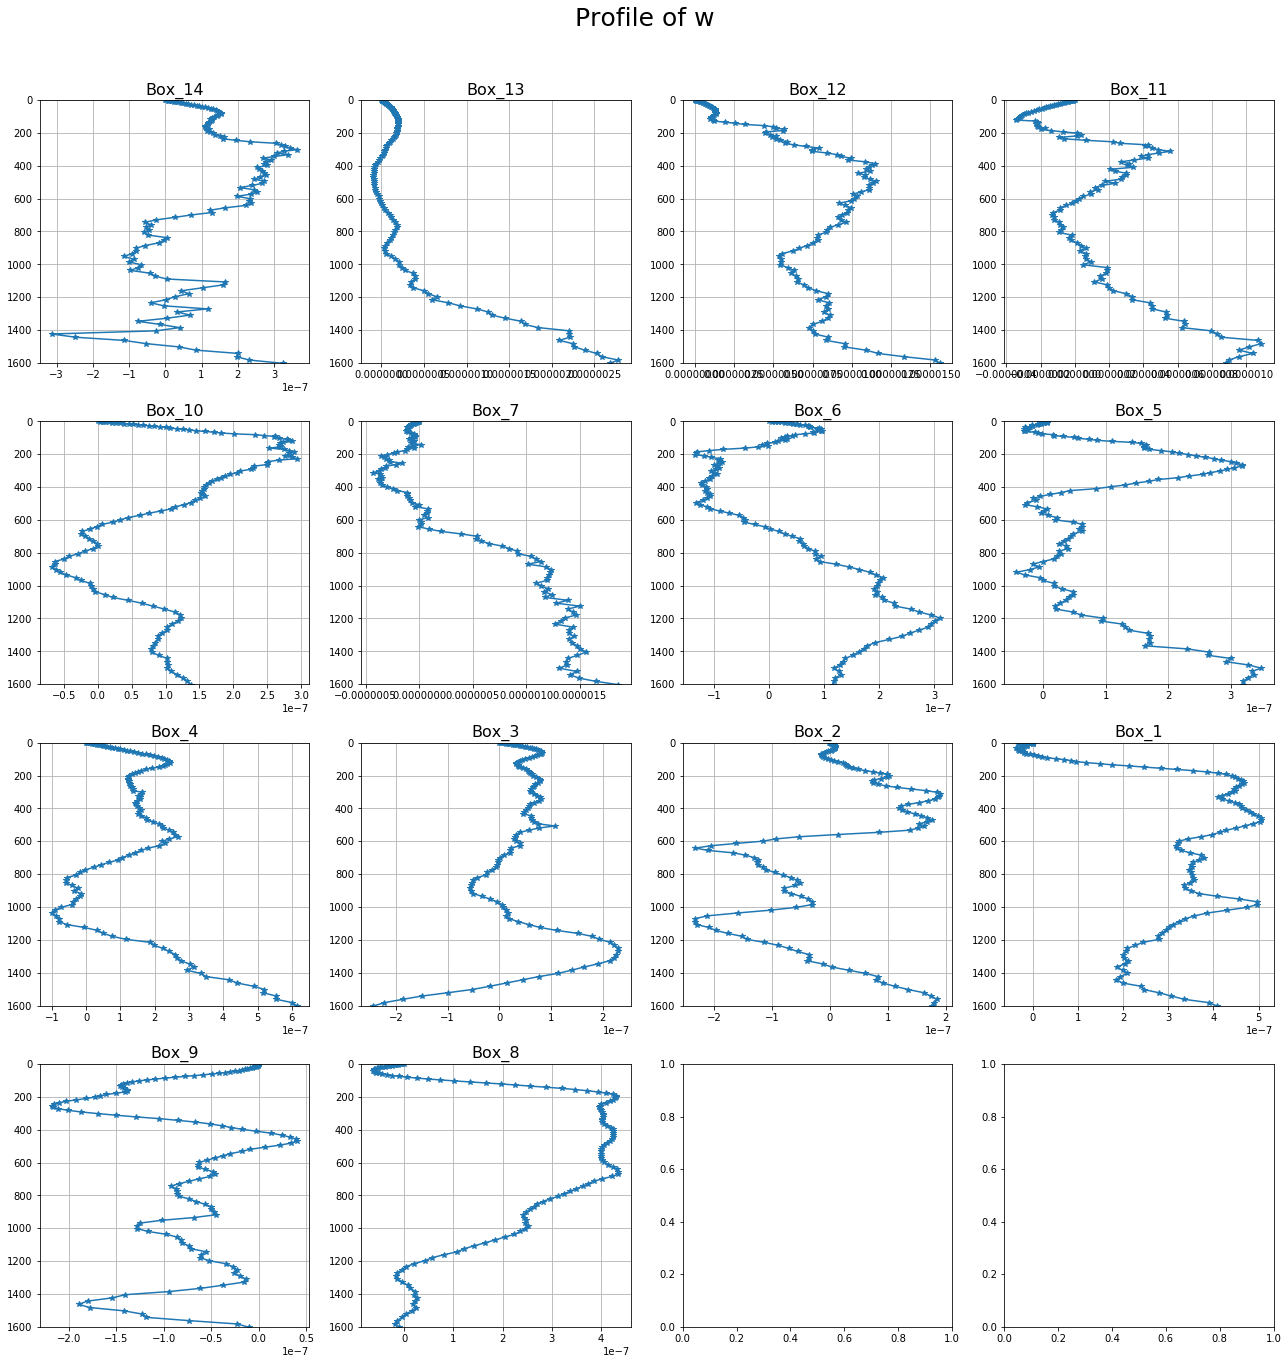

In [194]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Profile of w'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for k,box in enumerate(boxes):
    axs[i].plot(w_boxes_yr[k,:],dep,'C0*-')
    axs[i].set_title(box.name,size=16)
    axs[i].grid(True)
    axs[i].set_ylim(1600,0)
    i = i + 1
    fig.tight_layout()
    
#plt.savefig("NATL60_sub_vert_buoy_flx_2param_march.png")

In [81]:
def get_indices_box(box,data):
    jmin,jmax = box.jmin,box.jmax
    imin,imax = box.imin,box.imax
    return imin,imax,jmin,jmax


In [83]:
for k,box in enumerate(boxes):
    buoy = xr.open_dataset(buoyfile)['sobuoy']
    imin,imax,jmin,jmax=get_indices_box(box,buoy)
    print 'box n',box.name,' indices = ',imin,imax,jmin,jmax
    


box n Box_14  indices =  3374 3926 1780 2698
box n Box_13  indices =  2813 3375 1773 2696
box n Box_12  indices =  2309 2835 1777 2742
box n Box_11  indices =  1761 2239 1833 2785
box n Box_10  indices =  3681 4247 962 1778
box n Box_7  indices =  1931 2494 968 1802
box n Box_6  indices =  3684 4286 232 963
box n Box_5  indices =  3088 3686 232 957
box n Box_4  indices =  2491 3087 232 959
box n Box_3  indices =  1891 2488 232 961
box n Box_2  indices =  1288 1889 234 974
box n Box_1  indices =  695 1295 236 993
box n Box_9  indices =  3088 3676 957 1770
box n Box_8  indices =  2493 3088 958 1783


[ 0.00154439  0.0015441   0.00154372  0.00154345  0.00154312  0.00154294
  0.00154275  0.00154255  0.00154251  0.00154248]


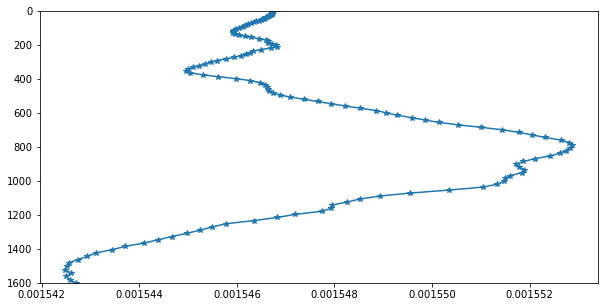

In [290]:
buoy = xr.open_dataset(buoyfile)['sobuoy']
tmask = xr.open_dataset(maskfile)['tmask']

buoy12 = buoy[0,:,1780:2698,3374:3926]
mask = tmask[0,:,1780:2698,3374:3926]

mask[117,820:850,470:500]=0
mask[129,485:510,360:400]=0

buoy_mask=ma.masked_where(mask == 0, buoy12)

prof=np.ones(len(dep))
for k in np.arange(len(dep)):
    prof[k]=np.nanmean(buoy_mask[k,:,:])

fig, axs = plt.subplots(1,1, figsize=(10, 5))
axs.plot(prof,dep,'C0*-')
axs.set_ylim(1600,0)

print prof[125:135]


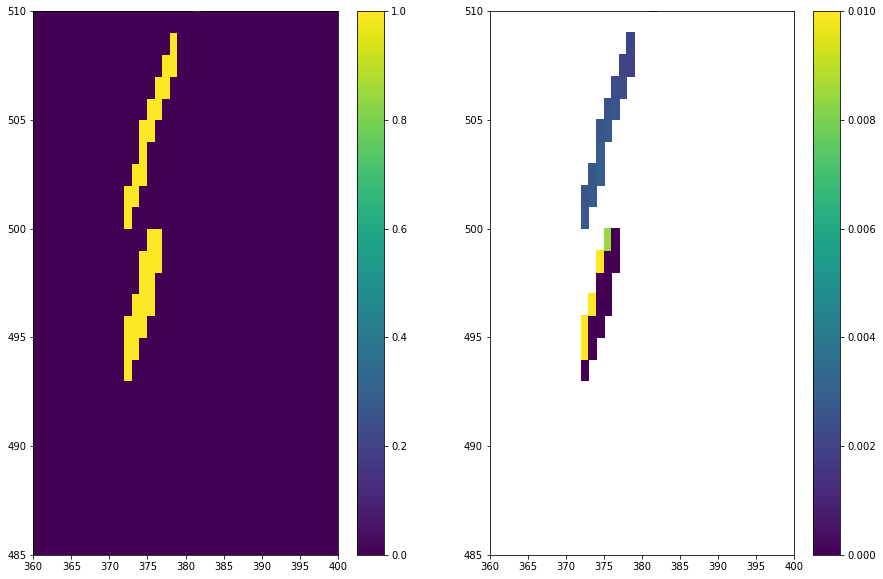

In [289]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(121)
pcolor=ax.pcolormesh(mask[129,:,:],vmin=0,vmax=1)
ax.set_ylim(485,510)
ax.set_xlim(360,400)
plt.colorbar(pcolor)

ax = fig.add_subplot(122)
pcolor=ax.pcolormesh(buoy_mask[129,:,:],vmin=0,vmax=0.01)
ax.set_ylim(485,510)
ax.set_xlim(360,400)
plt.colorbar(pcolor)


[ 0.00155911  0.00155845  0.00155756  0.00158847  0.71534101  0.0015552
  0.00155431  0.00155364  0.00155312  0.00155269  0.00155234  0.001552
  0.00155164  0.00155126  0.00155085]


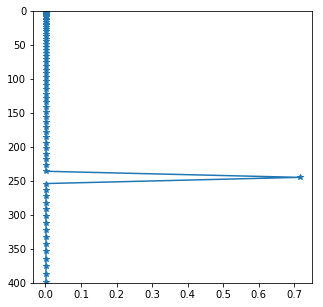

In [274]:
#box n Box_12  indices =  2309 2835 1777 2742

buoy = xr.open_dataset(buoyfile)['sobuoy']
tmask = xr.open_dataset(maskfile)['tmask']

buoy12 = buoy[0,:,1777:2742,2309:2835]
mask = tmask[0,:,1777:2742,2309:2835]
buoy_mask=ma.masked_where(mask == 0, buoy12)

prof=np.ones(len(dep))
for k in np.arange(len(dep)):
    prof[k]=np.nanmean(buoy_mask[k,:,:])

fig, axs = plt.subplots(1,1, figsize=(5, 5))
axs.plot(prof,dep,'C0*-')
axs.set_ylim(400,0)

print prof[45:60]


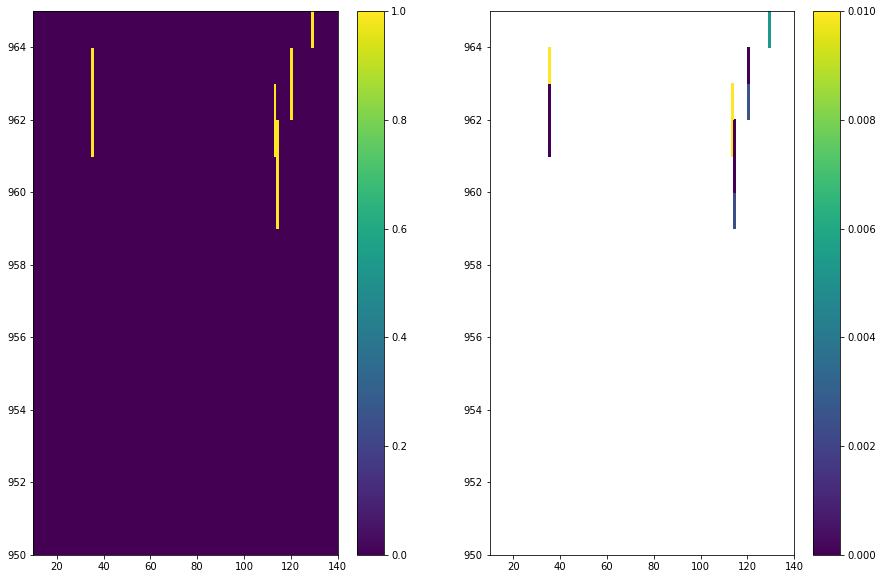

In [278]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(121)
pcolor=ax.pcolormesh(mask[49,:,:],vmin=0,vmax=1)
ax.set_ylim(950,965)
ax.set_xlim(10,140)
plt.colorbar(pcolor)

ax = fig.add_subplot(122)
pcolor=ax.pcolormesh(buoy_mask[49,:,:],vmin=0,vmax=0.01)
ax.set_ylim(950,965)
ax.set_xlim(10,140)
plt.colorbar(pcolor)


[ 0.00155239  0.00155157  0.00155089  0.0015505   0.00155029  0.0015502
  0.00154996  0.00154944  0.00155033  0.00154114  0.00154731  0.00154735
  0.00154691  0.00154622  0.00154662]


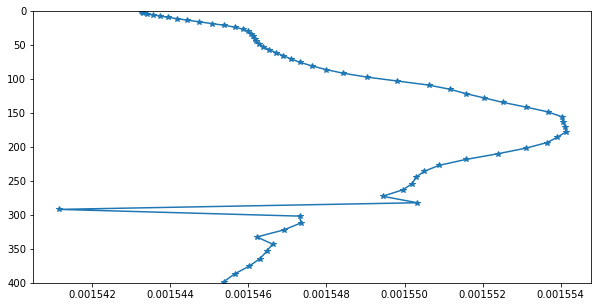

In [279]:
#box n Box_11  indices =  1761 2239 1833 2785


buoy = xr.open_dataset(buoyfile)['sobuoy']
tmask = xr.open_dataset(maskfile)['tmask']

buoy12 = buoy[0,:,1833:2785,1761:2239]
mask = tmask[0,:,1833:2785,1761:2239]
buoy_mask=ma.masked_where(mask == 0, buoy12)

prof=np.ones(len(dep))
for k in np.arange(len(dep)):
    prof[k]=np.nanmean(buoy_mask[k,:,:])

fig, axs = plt.subplots(1,1, figsize=(10, 5))
axs.plot(prof,dep,'C0*-')
axs.set_ylim(400,0)

print prof[45:60]


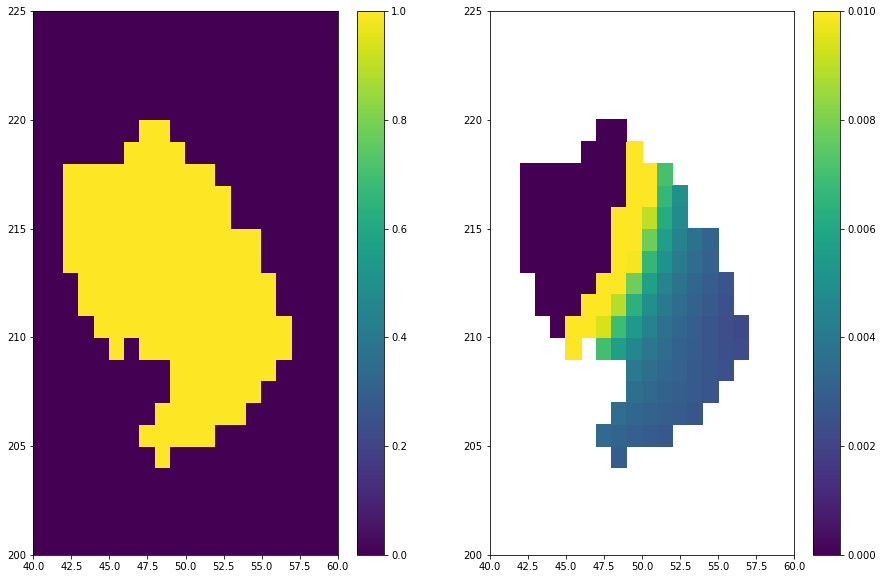

In [281]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(121)
pcolor=ax.pcolormesh(mask[54,:,:],vmin=0,vmax=1)
ax.set_ylim(200,225)
ax.set_xlim(40,60)
plt.colorbar(pcolor)

ax = fig.add_subplot(122)
pcolor=ax.pcolormesh(buoy_mask[54,:,:],vmin=0,vmax=0.01)
ax.set_ylim(200,225)
ax.set_xlim(40,60)
plt.colorbar(pcolor)
